# Car Price Prediction Project

In this project, I will try to make a supervised machine learning  to provide a car price prediction. Below are some sections that I will conduct in this project:

1. Data Cleansing & Preparation
2. Exploratory Data Analysis
3. Model Building 
4. Model Evaluation & Hyper Parameter Tuning

The dataset I use can be downloaded here: [Dataset Automobile](https://www.kaggle.com/toramky/automobile-dataset)


![Mobile](https://thinkingneuron.com/wp-content/uploads/2020/09/Car-price-prediction-case-study.png)


#### Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Import dataset

In [2]:
df = pd.read_csv('Automobile_data.csv')

**quick look**

In [3]:
pd.set_option('display.max_columns', 50)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## 1. Data Cleansing and Preparation

In this section, we will clean and prepare the data to make it proper for us to use it. The steps are below:
1. Check for duplicated data
2. Check for missing values and data types
3. Handling missing values
4. Handling outliers

**1. Check for Duplicated Data**

In [4]:
df.duplicated().sum()

0

No duplicated data

**2. Check for missing values and data types**

In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

No null values, but data type still not suitable as it should be. We will change the data type for some columns.

In [6]:
#Changing data type
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')

We change the data type of price, bore, stroke, hourspower, and peak-rpm to numerical because we will use it as features later.

**3. Handling missing values**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

At the beginning, there were no null values, but because we change the data type now some values are missing. Hence, we have to handle the missing value. We will see the distribution of each variable. If the variable has a normal distribution, use mean() to fill the missing value. Otherwise, we use mode() instead.

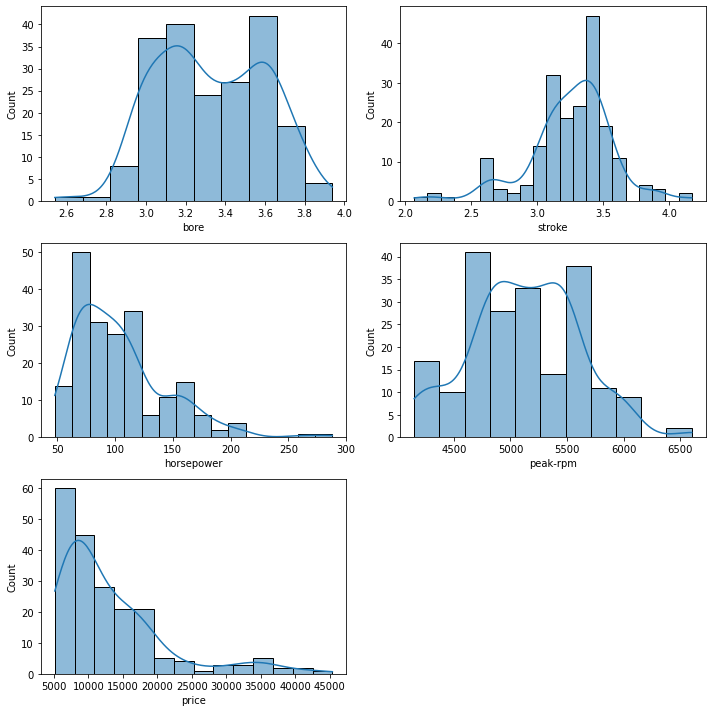

In [8]:
#See the distribution
plt.figure(figsize=(10,10))
plt.subplot(321)
sns.histplot(data= df, x= 'bore', kde = 'True')
plt.subplot(322)
sns.histplot(data= df, x= 'stroke', kde = 'True')
plt.subplot(323)
sns.histplot(data= df, x= 'horsepower', kde = 'True')
plt.subplot(324)
sns.histplot(data= df, x= 'peak-rpm', kde = 'True')
plt.subplot(325)
sns.histplot(data= df, x= 'price', kde = 'True')

plt.tight_layout()

All variables have no normal distribution.

In [9]:
#Handling missing values
df['bore'].fillna(df['bore'].mode()[0], inplace=True)
df['stroke'].fillna(df['horsepower'].mode()[0], inplace=True)
df['peak-rpm'].fillna(df['peak-rpm'].mode()[0], inplace=True)
df['horsepower'].fillna(df['horsepower'].mode()[0], inplace=True)
df['price'].fillna(df['price'].mode()[0], inplace=True)

Since all variables have no normal distribution, use mode() to fill the missing values.

In [10]:
print(df['bore'].isna().sum())
print(df['stroke'].isna().sum())
print(df['peak-rpm'].isna().sum())
print(df['horsepower'].isna().sum())
print(df['price'].isna().sum())

0
0
0
0
0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

All null values have been handled.

#### 4. Handling Outliers

First, check for outliers in the dataset

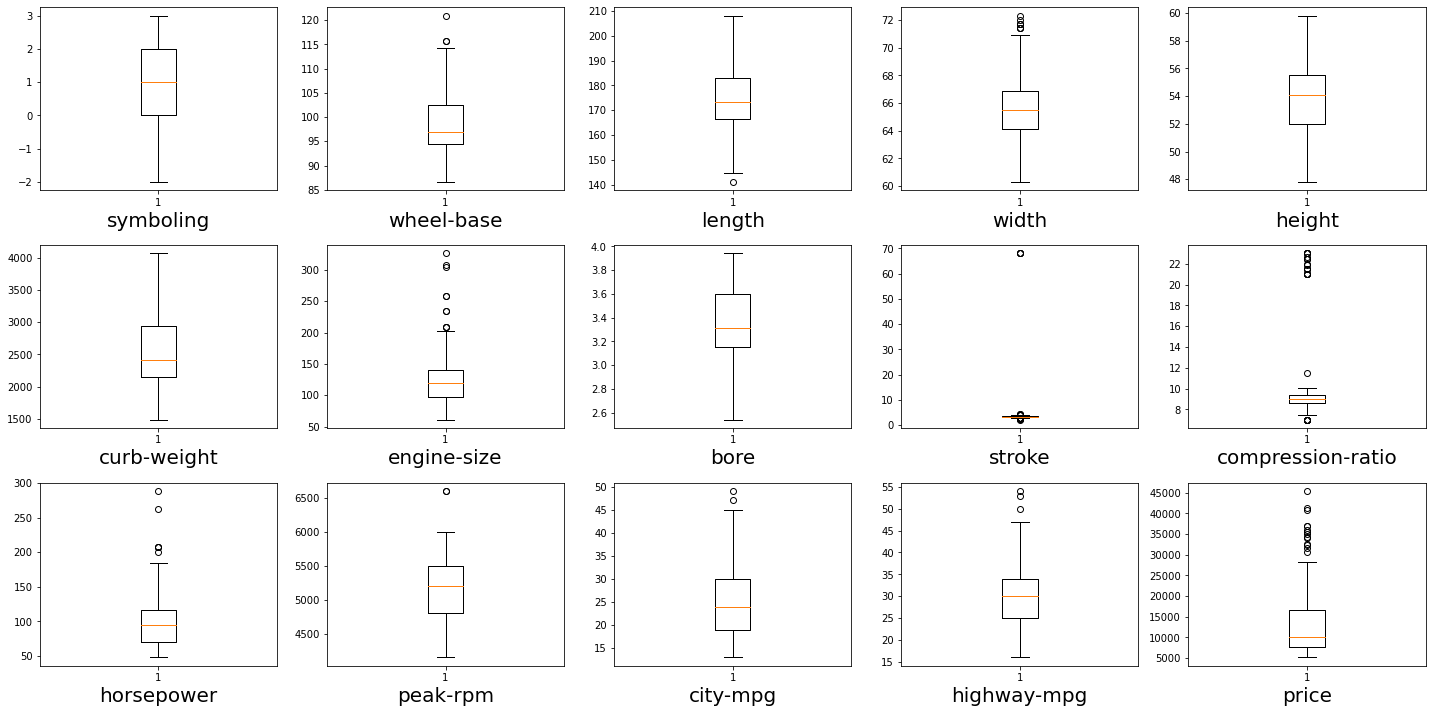

In [12]:
#Detecting outliers with boxplot 

cols = ['symboling','wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

plt.figure(figsize=(20,10))
for i,x in enumerate(cols):
    plt.subplot(3,5,(i+1))
    plt.boxplot(df[x])
    plt.xlabel(x, fontsize=20)    
plt.tight_layout()

In [13]:
df['price'].sort_values()

138     5118.0
18      5151.0
50      5195.0
150     5348.0
76      5389.0
        ...   
17     36880.0
128    37028.0
73     40960.0
16     41315.0
74     45400.0
Name: price, Length: 205, dtype: float64

As we can see on the boxplots above, there are ouliers in our variables. Nevertheless, if we try to understand the context of outliers in each variables, we'll find out that those outliers are real data and not defected data (typo, outscale, wrong data type). Since they are real data, they may contain information that we need. For example, the 'price' column contains so many outliers. We see some high prices such as 45400, 41315, and 40960. These prices are very high and may laid far away from the 1.5 * IQR, but it's make sense since we know that some type of cars such as luxury cars and sport cars are pricy. Hence, we'll keep the data that way and do nothing with it.

## 2. Exploratory Data Analysis

In this section, we will try to visualize some necessary points of this case. In order to do that, we will find out the answer of these business questions:

1. What is the most correlated variable of a car's price?
2. Does the car's efficiency (city & highway mpg) influence the car's price?
3. Does the car's engine-size influence the car's price?
4. How is the car's price distribution in this case?

**1. What is the most correlated variable of a car's price?**

<AxesSubplot:>

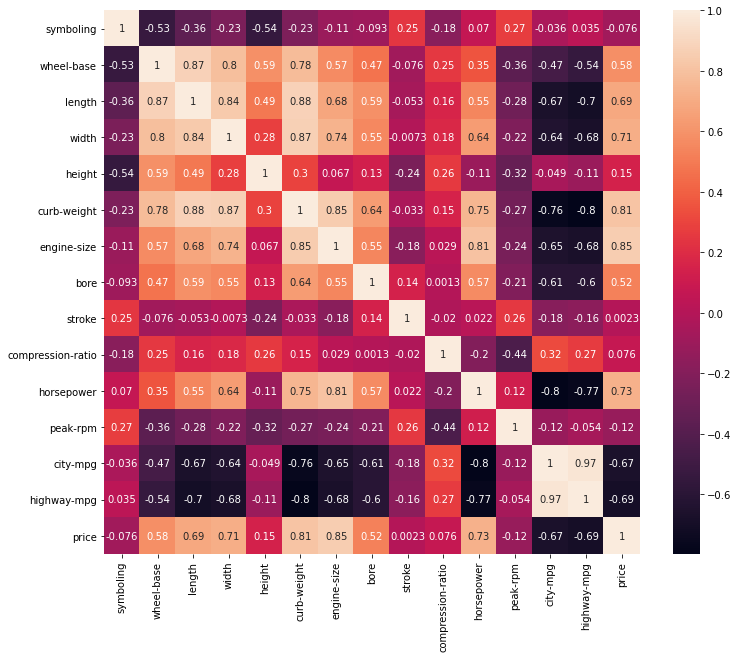

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

As we can see from the heatmap above, 'length', 'width', 'curb-weight', 'engine-size','compression-ratio','horsepower', 'city-mpg', and 'highway-mpg' variable have significant correlation (>0.6 or <(-0.6)) with the car's price

**2. Does the car's efficiency (city & highway mpg (miles per galloon)) influence the car's price?**

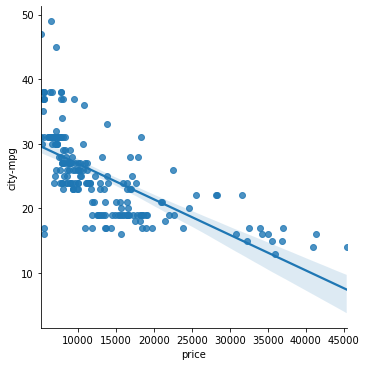

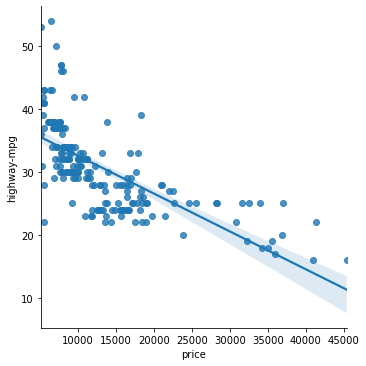

In [15]:
sns.lmplot(data=df, x='price', y='city-mpg')
sns.lmplot(data=df, x='price', y='highway-mpg')

As we can see from the chart above, car's efficiency influences the car's price. The higher the mpg, the cheaper the car. This is make sense since we know that commonly expensive cars are luxury or sports cars, which they are relatively high-consuming fuel cars.

**3. Does the car's engine (engine-size and engine horsepower) influence the car's price?**

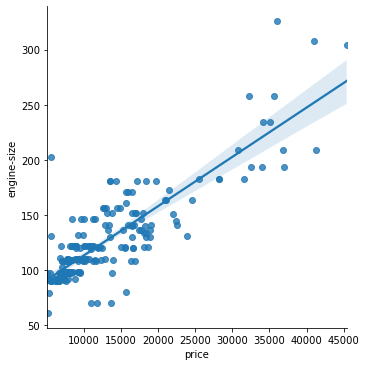

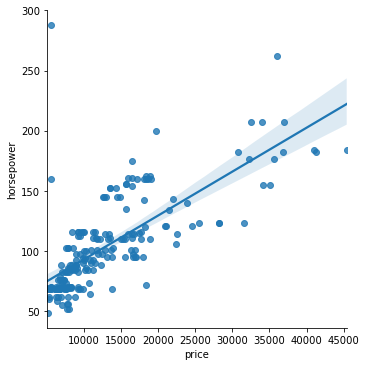

In [35]:
sns.lmplot(data=df, x='price', y='engine-size')
sns.lmplot(data=df, x='price', y='horsepower')

As we can see from the chart above, car's engine influences the car's price. The higher the engine-size and horsepower, the more expensive the car. This is make sense since we know that commonly the more expensive the car, the bigger car's engine capacity and performance.

**4. How is the car's price distribution in this case?**

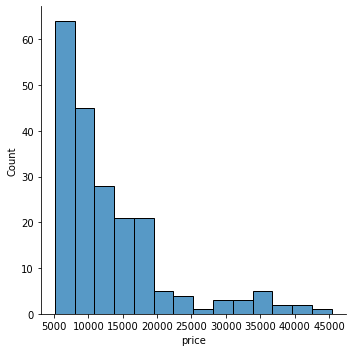

In [17]:
sns.displot(df['price'], kind='hist')

Most of the cars exist are relatively lower-price cars.

## 3. Model Building

In this section, we will build the machine learning model to predict the car's price based on determined variable. The steps conducted in this section are:
1. Prepare the Data
2. Split Data Train and Data Test
3. Train the Model
4. Test the Model
5. Show the Model Result

#### 1. Prepare the Data

We only use 'length', 'width', 'curb-weight', 'engine-size','compression-ratio','horsepower', 'city-mpg', 'highway-mpg' variables as our feature since these variables have significant correlation (details on EDA section above) to the target ('price').

In [50]:
df2 = df[['length', 'width', 'curb-weight', 'engine-size','compression-ratio','horsepower', 'city-mpg', 'highway-mpg','price']]
df2.head()

,length,width,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,price
0,168.8,64.1,2548,130,9.0,111.0,21,27,13495.0
1,168.8,64.1,2548,130,9.0,111.0,21,27,16500.0
2,171.2,65.5,2823,152,9.0,154.0,19,26,16500.0
3,176.6,66.2,2337,109,10.0,102.0,24,30,13950.0
4,176.6,66.4,2824,136,8.0,115.0,18,22,17450.0


**2.Split Data Train and Data Test**

In [236]:
x = df2[['length', 'width', 'curb-weight', 'engine-size','compression-ratio','horsepower', 'city-mpg', 'highway-mpg']] #feature
y = df2['price'] #target

In [237]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=99)

**3.Train the Model**

In [238]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [239]:
mlr = LinearRegression()
ridge = Ridge(random_state=42)
lasso = Lasso(random_state=42)
en = ElasticNet(random_state=42)
rf = RandomForestRegressor(random_state=42)
dt = DecisionTreeRegressor(random_state=42)

In [240]:
mlr.fit(x_train, y_train)
ridge.fit(x_train,y_train)
lasso.fit(x_train,y_train)
en.fit(x_train,y_train)
rf.fit(x_train,y_train)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

**4. Test the Model**

In [241]:
mlr_pred = mlr.predict(x_test)
ridge_pred = ridge.predict(x_test)
lasso_pred = lasso.predict(x_test)
en_pred = en.predict(x_test)
rf_pred = rf.predict(x_test)
dt_pred = dt.predict(x_test)

**5. Show the Model Result**

In [242]:
eval = pd.DataFrame({'Actual': y_test, 'MultiLinear Regression': mlr_pred, 'Ridge Regression': ridge_pred, \
                     'Lasso Regression': lasso_pred, 'ElasticNet Regression': en_pred, 'RandomForest Regressor': rf_pred, \
                    'DecisionTree Regressor': dt_pred})
eval.head(10)

,Actual,MultiLinear Regression,Ridge Regression,Lasso Regression,ElasticNet Regression,RandomForest Regressor,DecisionTree Regressor
71,34184.0,30554.730157,30553.489985,30554.467974,30505.275540,35721.971429,35056.0
24,6229.0,5615.430151,5617.224782,5617.164482,5713.559649,6487.702333,6229.0
51,6095.0,5689.855442,5691.443120,5691.639451,5773.671202,6679.640000,6795.0
162,9258.0,7973.038791,7973.420391,7973.463391,7990.119895,8021.400000,8358.0
97,7999.0,7282.176724,7281.563631,7280.875277,7251.872522,7514.485000,7799.0
40,10295.0,10331.716885,10330.591959,10328.427791,10279.812764,9056.146667,8845.0
124,12764.0,18495.266033,18494.450279,18494.736782,18452.918326,14361.100000,12964.0
84,14489.0,18431.788855,18431.583685,18431.557661,18431.436779,14678.640000,14869.0
142,7775.0,10025.255269,10023.757464,10024.320440,9936.807616,7864.970000,7126.0
131,9895.0,12687.223201,12692.156750,12691.991037,12942.224040,10166.700000,9295.0


## 4. Model Evaluation & Hyperparameter Tuning

This is the final section of the project. Previously, we have built our model and see each algorithm result. The next step is model evaluation and hyperparameter tuning. In model evaluation, we will find out which algorithm give us the best performance, in this term: the lowest Mean Average Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and the highest Chi-Square (R2) score. After we find out the best algorithm, we conduct the hyperparameter tuning to optimize its accuracy.

**1. Model Evaluation**

In [137]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics

In [222]:
model = ['Linear Regression', 'Ridge', 'Lasso', 'ElasticNet', 'RandomForest Regressor', 'DecisionTree Regressor']
model_pred = [mlr_pred, ridge_pred, lasso_pred, en_pred, rf_pred, dt_pred]
mae= []
mse = []
rmse = []
r2_score = []

for i in range(len(model)):
    mae.append(metrics.mean_absolute_error(y_test, model_pred[i]))
    mse.append(metrics.mean_squared_error(y_test, model_pred[i]))    
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, model_pred[i])))    
    r2_score.append(metrics.r2_score(y_test, model_pred[i]))    

eval= pd.DataFrame({'MAE': mae, 'MSE':mse, 'RMSE': rmse, 'R2_Score':r2_score}, index=model).sort_values('RMSE')
eval

,MAE,MSE,RMSE,R2_Score
RandomForest Regressor,1923.093527,1.028119e+07,3206.428995,0.787726
DecisionTree Regressor,1942.817073,1.240422e+07,3521.962179,0.743892
ElasticNet,2570.682965,1.299607e+07,3605.006856,0.731672
Ridge,2611.534968,1.340698e+07,3661.553691,0.723188
Lasso,2611.634900,1.340854e+07,3661.766880,0.723156
Linear Regression,2612.290691,1.341444e+07,3662.572731,0.723034


From the table above, we can conclude that RandomForestRegressor give us the best performance (got the lowest MAE, MSE, RMSE, and highest R2 Score). Hence, we will do hyperparameter tuning for this algorithm.

**2. Hypermarameter Tuning**

Actually, there are some ways to do hyperparameter tuning. Nevertheless, due to time consideration, we will use RandomizedSearchCV for this matter.

In [158]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

In [232]:
model= RandomForestRegressor(random_state=99)

grid = {'criterion': ['mse','mae'], 'max_depth': [60, 70, 80, 90, 100], 'max_features': [2, 3], 'min_samples_leaf': [3,4,5],
        'min_samples_split': [8, 10, 12], 'n_estimators': [100, 200, 300, 1000]}

search = RandomizedSearchCV(estimator = rf, param_distributions = grid, n_iter = 100, cv = 5, \
                               verbose=2, random_state=42, n_jobs = -1)
search.fit(x_train, y_train)
search.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestRegressor(max_depth=70, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=200, random_state=42)

We got the parameters, now we re-test the algorithm using the parameters and see the result.

In [234]:
rf2 = RandomForestRegressor(max_depth=70, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=200, random_state=42)
rf2.fit(x_train,y_train)
rf2_pred = rf2.predict(x_test)

In [235]:
mae = mean_absolute_error(y_test, rf2_pred)
mse = mean_squared_error(y_test, rf2_pred)   
rmse = np.sqrt(mean_squared_error(y_test, rf2_pred))
r2 = metrics.r2_score(y_test, rf2_pred)

print('Before Hyperparameter Tuning')
print('MAE:', eval['MAE'][0])
print('MSE:', eval['MSE'][0])
print('RMSE:', eval['RMSE'][0])
print('R2_Score:', eval['R2_Score'][0])
print(''*50)
print('After Hyperparameter Tuning')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 Score:', r2)

Before Hyperparameter Tuning
MAE: 1923.0935267131242
MSE: 10281186.89699356
RMSE: 3206.4289945348173
R2_Score: 0.7877260760468345

After Hyperparameter Tuning
MAE: 1911.4437104828949
MSE: 9891454.199062472
RMSE: 3145.068234404855
R2 Score: 0.7957728210298362


As we can see, the algorithm performance after hyperparameter tuning is getting better: the MAE, MSE, RMSE is smaller and R2 Score is higher. Hence, we will use the RandomForestRegressor with the optimal parameters that found as our machine learning algorithm.

## Conclusion and Suggestions

In this project, we get the final model that has quite good goodness-of-fit (R2 Score), but still high error (MAE,MSE,RMSE). There are some steps that can be conducted to optimize the model such as data scalling and feature engineering. Besides, due to time consideration, the hyperparameter tuning conducted in this project was not the best method. For further development, it is suggested to use GridSearchCV method in hyperparameter tuning in order to optimize the model's performance.